In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv


In [2]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
%matplotlib inline

In [3]:
# Read the data
data = pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv')
data.drop(columns='id', inplace=True)
data.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
data.tail()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,11,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211
97999,0.755170,0.567483,1.456767,-0.579071,-0.048474,-1.206240,0.784305,0,11,3,...,1.180805,-0.925705,-1.368680,-2.465425,1.453582,-1.685122,0.129689,-0.970897,1.404988,-0.711098


In [5]:
# So we have 9799 observations
data.shape

(98000, 29)

In [6]:
# With 29 features

In [7]:
# Import other libraries for unsupervised learning

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

from sklearn.cluster import KMeans
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
from cycler import cycler
from IPython.display import display
import datetime

In [8]:
# Take basic info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

In [9]:
# Watch the central tendency of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.0,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


In [10]:
import plotly.express as px
data.describe().T.style.bar(subset=['mean'], color=px.colors.qualitative.Pastel[4])\
                                        .background_gradient(subset=['std'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
f_00,98000.000000,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.000000,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.000000,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.000000,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.000000,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.000000,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.000000,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.000000,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.000000,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.000000,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


In [11]:
# Se wether any noixce or missing data is present or not
data.isnull().sum()

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [12]:
# We dont have the missing data in the dataset

In [13]:
# any missing values and duplicats
print("Data Shape: There are {:,.0f} rows and {:,.0f} columns.\nMissing values = {}, Duplicates = {}.\n".
      format(data.shape[0], data.shape[1],data.isna().sum().sum(), data.duplicated().sum()))

Data Shape: There are 98,000 rows and 29 columns.
Missing values = 0, Duplicates = 0.



### INFERANCE:
 - 1) Total 28 colums in this dataset
 - 2) Columns F7-F13 seems to have large values when compared to others. May be these columns are categorical data.
 - 3) we need to apply scaling before clustering.

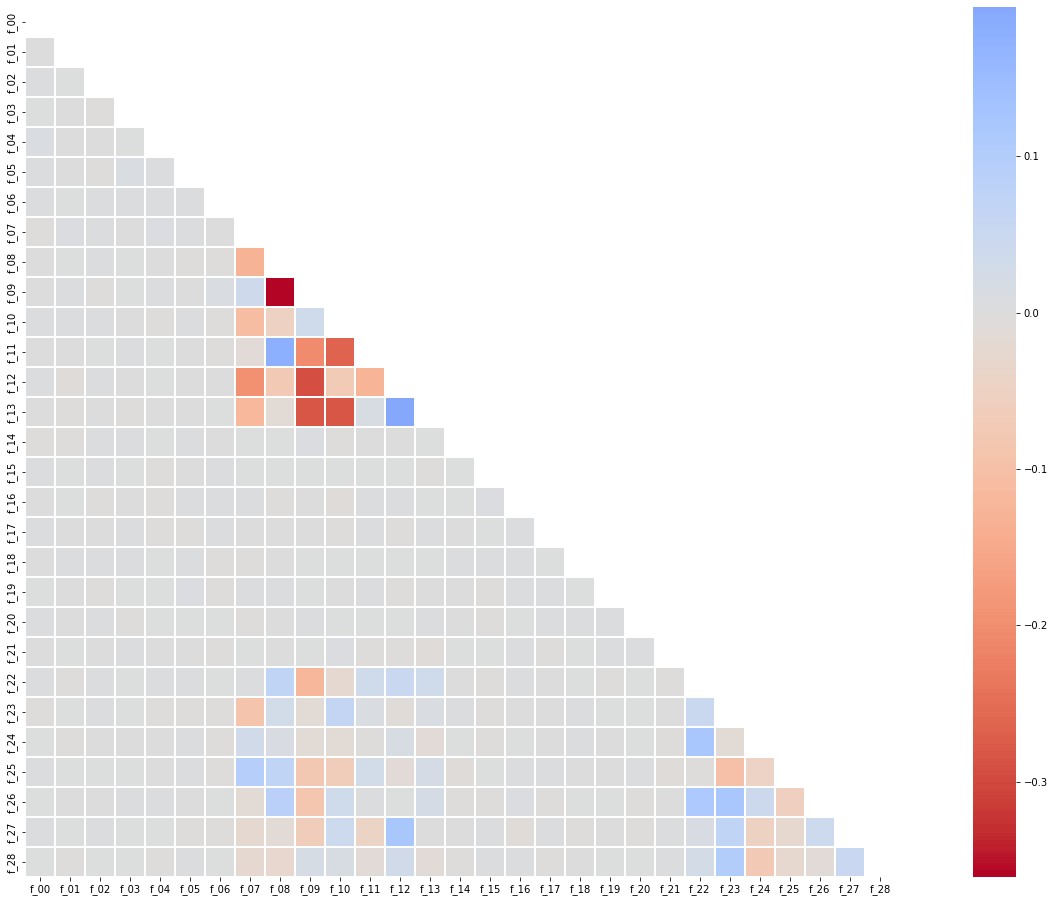

In [14]:
# Find out the correlation
fig, ax = plt.subplots(figsize=(28,16))
corr_mat = data.corr()
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, mask=mask, square=True, ax=ax, linewidths=0.1,center=0, cmap='coolwarm_r');

In [15]:
#  F9 is highly correlated with F8.

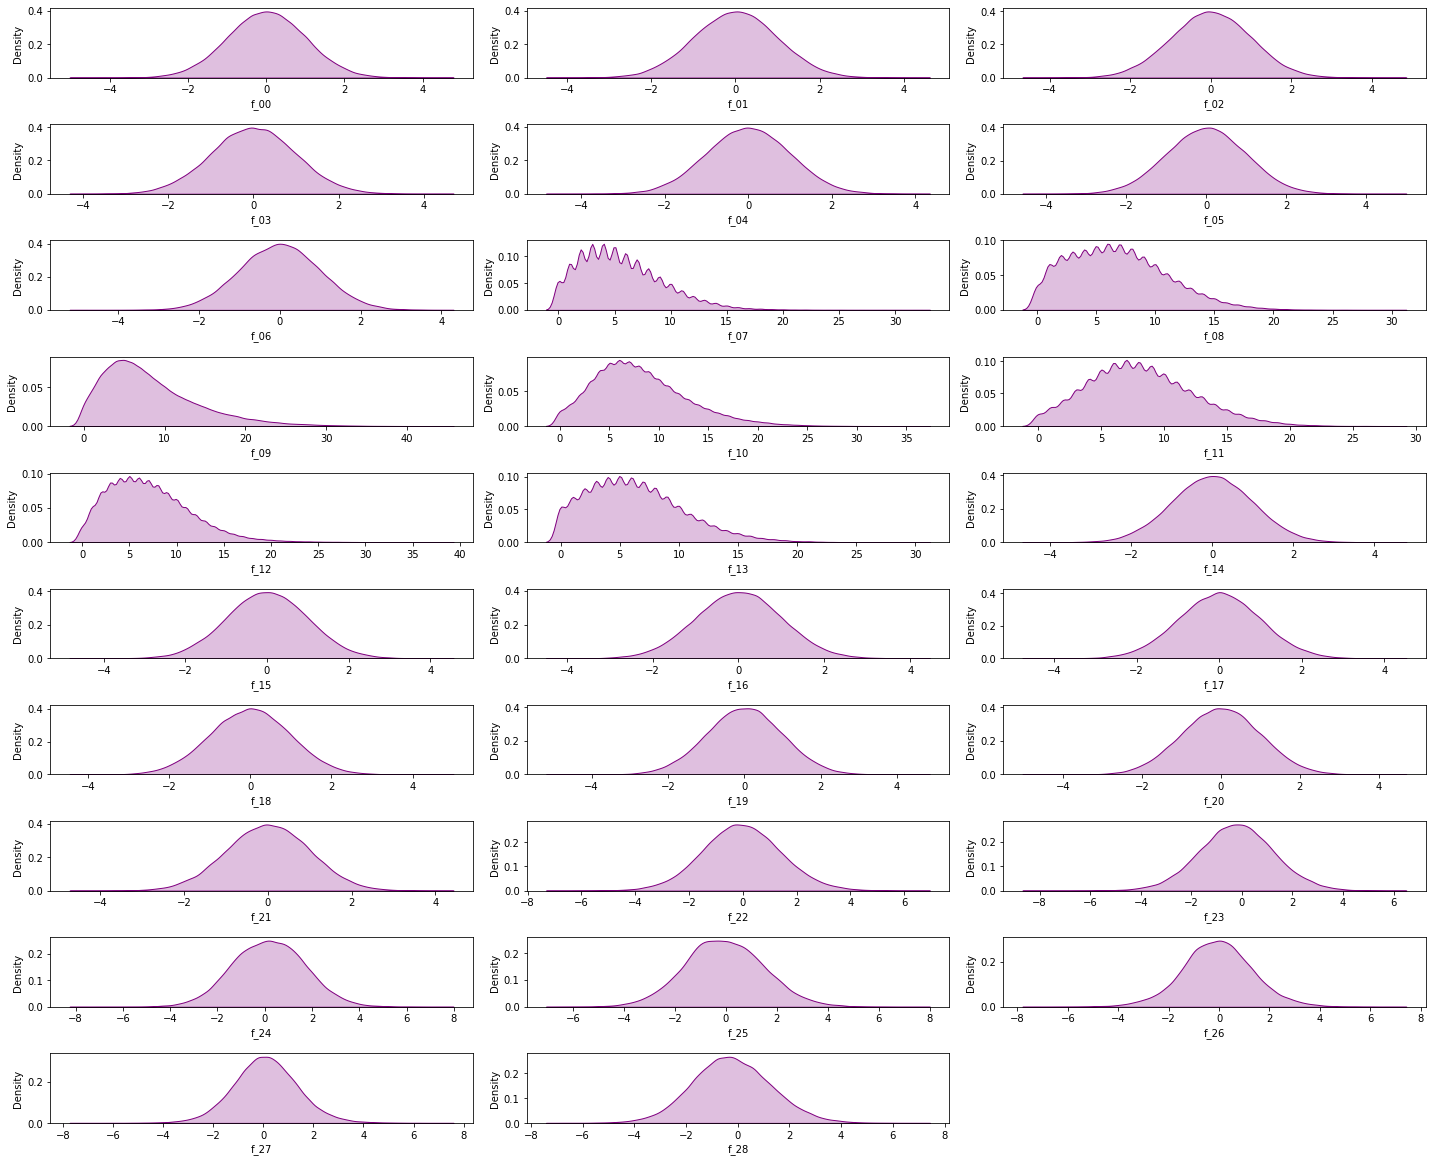

In [16]:
fig = plt.figure(figsize=(20,40))

for i, col in enumerate(data.columns):
    plt.subplot(25,3, i+1)
    sns.kdeplot(data[col], fill=True, color='purple')
    
plt.tight_layout()

In [17]:
# lets divide the dataset into two subsets
subset1=data.drop(['f_07','f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13'], axis = 1)
subset2 = data[['f_07','f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']].copy()

# Lets take a closer look at the subset1
subset1.drop('id', axis=1).describe().T.style.bar(subset=['mean'], color=px.colors.qualitative.Pastel[4])\
                                        .background_gradient(subset=['std'], cmap='Greens')

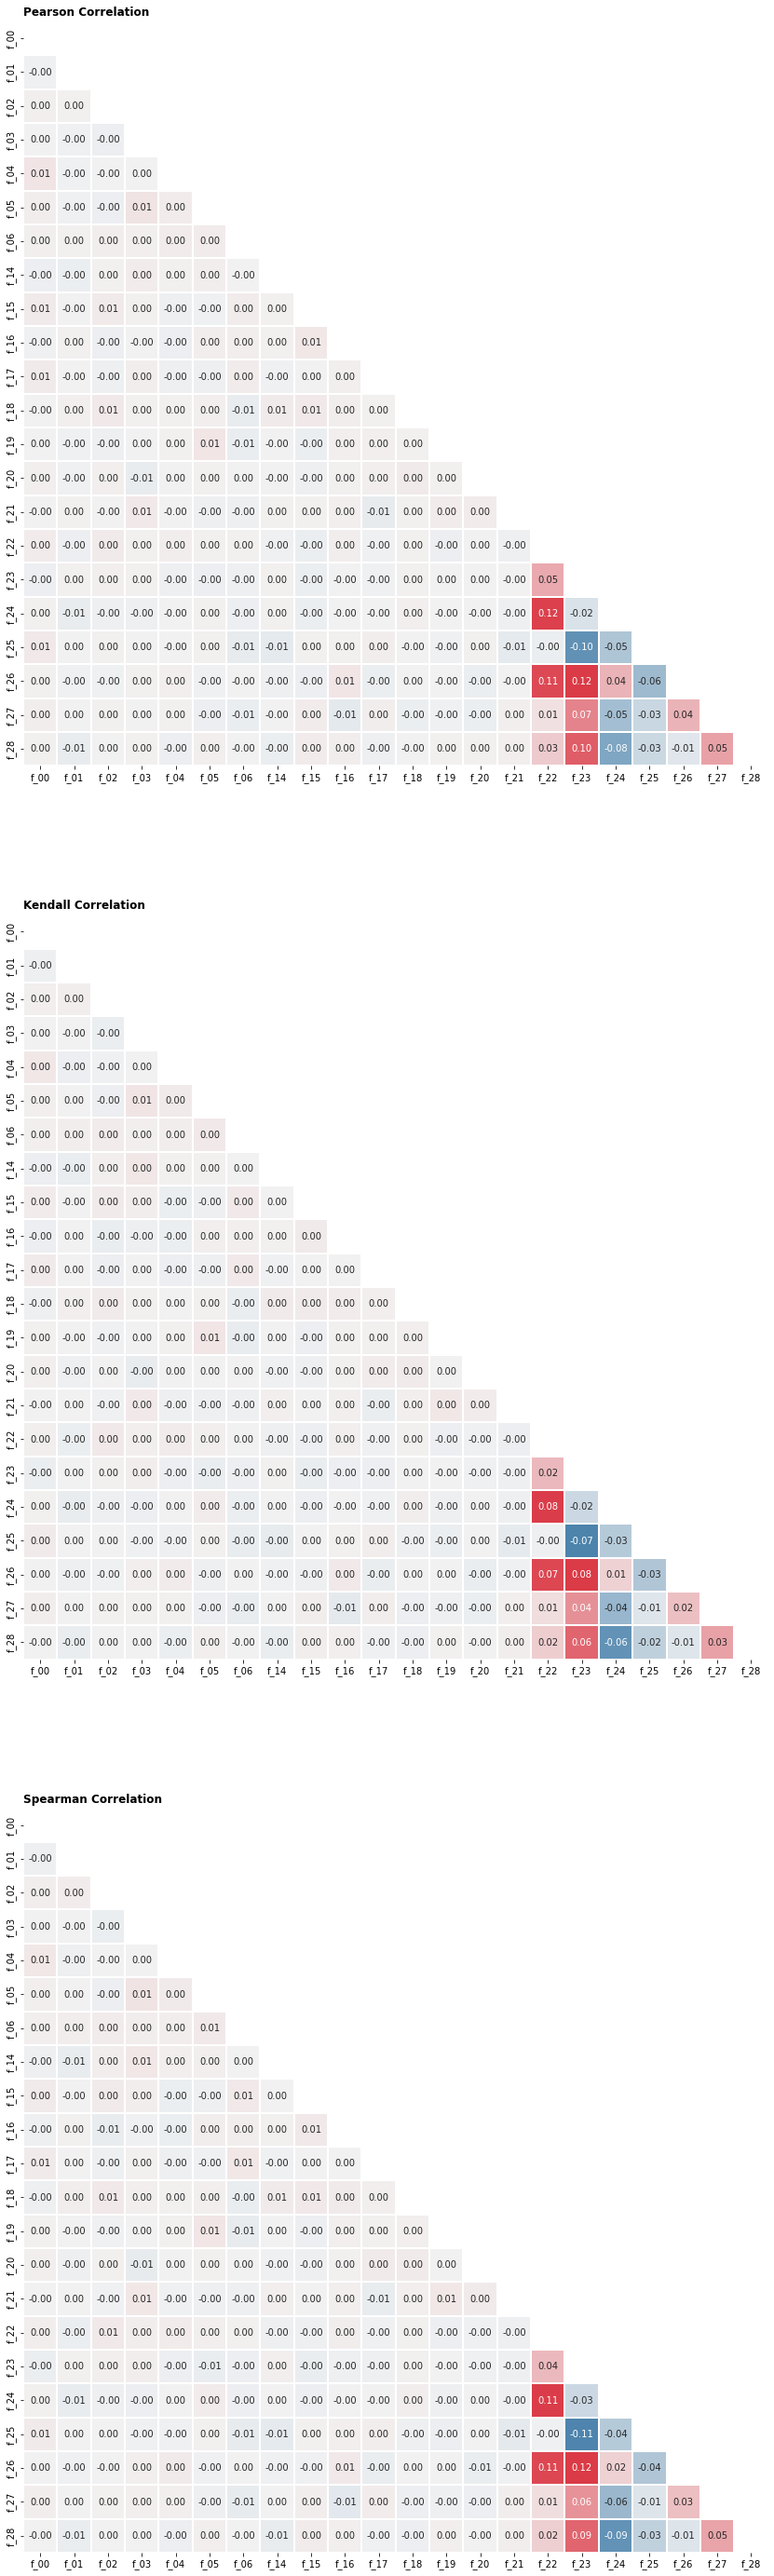

In [18]:
#plotting correlation for subset1
fig, ax = plt.subplots(3, 1, figsize=(150 , 50))
corr = subset1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(subset1.corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     
plt.show()

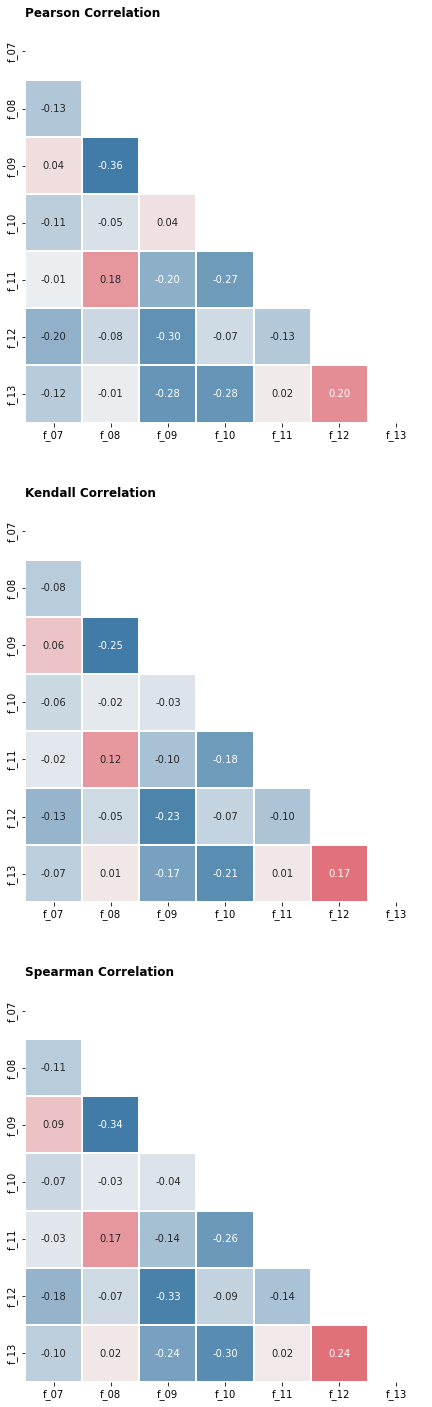

In [19]:
#plotting correlation for subset2
fig, ax = plt.subplots(3, 1, figsize=(50 , 25))
corr = subset2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(subset2.corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     
plt.show()

# Unspervised Learning


In [20]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df=pd.DataFrame(data_scaled, index=data.index, columns=data.columns)
data_scaled_df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389551,-0.917695,0.649105,0.589499,-0.824775,0.734849,2.267432,-0.960479,1.502035,0.983395,...,-0.471839,-0.754257,-0.762195,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,-0.688544,-0.459195,0.654321,0.995533,-1.644472,0.864967,-0.087835,-0.960479,-0.906254,-0.371415,...,-0.422434,-0.089129,-1.783073,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,0.805607,0.318753,-1.167963,-0.623531,0.108638,0.785146,1.996476,-0.147872,1.020377,-0.540766,...,-0.407243,-1.597140,1.193015,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,-0.500743,0.223305,0.264788,0.232124,0.417259,-1.219016,0.142257,0.122997,-1.147082,0.814044,...,0.621083,1.284518,0.534669,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,-0.670613,-1.044343,-0.268745,-1.828801,-0.285713,-1.850223,0.786963,0.664735,0.057062,-0.540766,...,-1.617255,-0.433152,0.324273,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094


### Identifying the optimal number of clusters

#### Elbow method
As name suggests, elbow method uses structure of arm to identify optimal number of clusters. As shown in the below figure The elbow point is found when the dataset becomes flat or linear after applying the cluster analysis algorithm. Its worth to that, depending on the value of parameter ‘metric’ the structure of the elbow method may change. Typically, clustering algorithm is applied on the dataset for a given number of clusters to find groups in data in unlabeled data. After that, an average score has been calculated according to the parameter ‘metric’. The default value for the metric parameter is ‘distortion’ which calculates the sum of squared distances from the assigned centroids

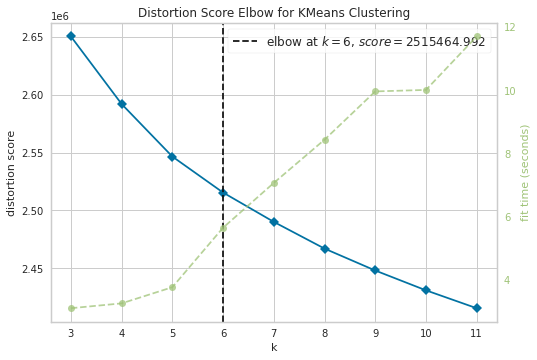

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer
Plot_elbow = KElbowVisualizer(KMeans(random_state=20), k=(3,12))
Plot_elbow.fit(data_scaled_df.values)
Plot_elbow.show()

As we can see above two plots, based on the K range, the optimum K value changes from 6 to 13. Elbow method might not be useful to identify optimum cluster size. Need further investigation. Lets try another way

### Silhouette Score Method
The silhouette score of a point measures how close that point lies to its nearest neighbor points, across all clusters. It provides information about clustering quality which can be used to determine whether further refinement by clustering should be performed on the current clustering. Lets take a look at the same data with two different type of clustering.
The silhouette coefficient can take values in the interval [-1, 1].

 - If it is 0 –> the sample is very close to the neighboring clusters.
 - it is 1 –> the sample is far away from the neighboring clusters.
 - it is -1 –> the sample is assigned to the wrong clusters.

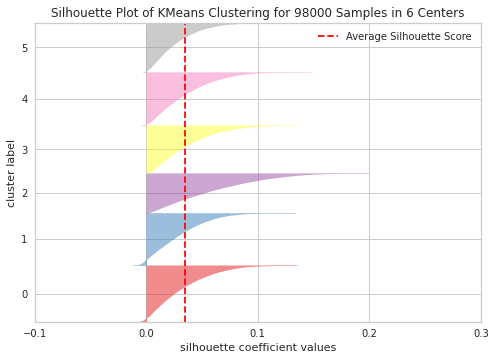

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98000 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
# Instantiate the clustering model and visualizer 
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(data_scaled_df.values)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

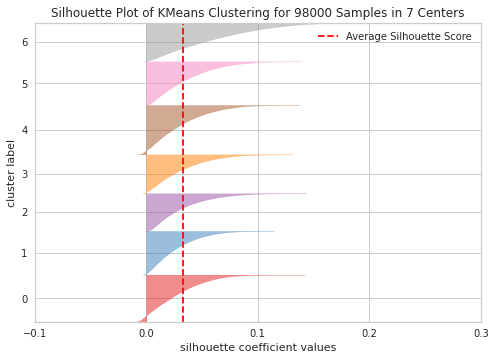

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98000 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
# Instantiate the clustering model and visualizer 
model = KMeans(7)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(data_scaled_df.values)    # Fit the data to the visualizer
visualizer.show() 

As we can see above there are some negative silehoutte coefficient values for both 7 and 8, which indicate they might not be perfect optimal cluster number Intercluster distance maps for various scenarios can be found below. It has been noticed these plots vary randomly (if you run the same cell twice, the results vary) which makes it difficult to interpret them. Further investigation is needed

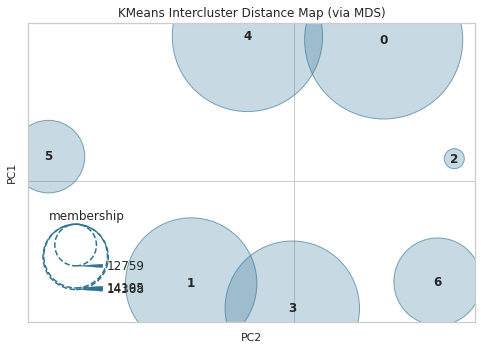

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [24]:
# Instantiate the clustering model and visualizer
model = KMeans(7)
visualizer = InterclusterDistance(model)
visualizer.fit(data_scaled_df.values)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

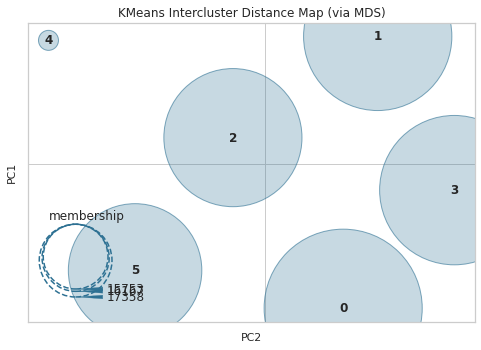

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [25]:
# Instantiate the clustering model and visualizer
model = KMeans(6)
visualizer = InterclusterDistance(model)
visualizer.fit(data_scaled_df.values)        # Fit the data to the visualizer
visualizer.show() 

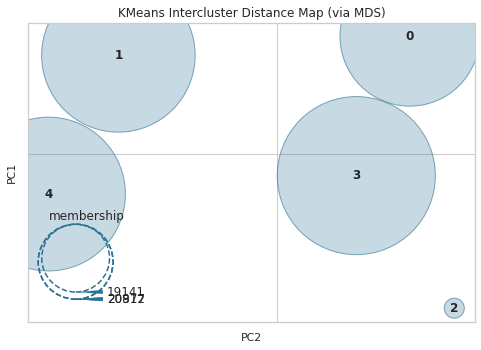

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [26]:
# Instantiate the clustering model and visualizer
model = KMeans(5)
visualizer = InterclusterDistance(model)
visualizer.fit(data_scaled_df.values)        # Fit the data to the visualizer
visualizer.show()

# dimension reduction

### Autoencoder approach:
AutoEncoder is an unsupervised Artificial Neural Network that attempts to encode the data by compressing it into the lower dimensions (bottleneck layer or code) and then decoding the data to reconstruct the original input. The bottleneck layer (or code) holds the compressed representation of the input data.

In [27]:
import tensorflow as tf
n_components = 15   # here we are choosing 15 means, the number of columns will decrese frm 29 to 15.

tf.random.set_seed(42)
KI = tf.keras.initializers.glorot_uniform(seed=42)

encoder_input = tf.keras.layers.Input(shape=(data_scaled_df.shape[1],), name="Input")
encoder_x = tf.keras.layers.Dense(256, activation="relu", kernel_initializer=KI, name="Encoder")(encoder_input)
encoder_output = tf.keras.layers.Dense(n_components, activation="swish", kernel_initializer=KI, name="Bottleneck")(encoder_x)

decoder_x = tf.keras.layers.Dense(256, activation="relu", kernel_initializer=KI, name="Decoder")(encoder_output)
decoder_output = tf.keras.layers.Dense(data_scaled_df.shape[1], kernel_initializer=KI, name="Output")(decoder_x)

encoder = tf.keras.Model(encoder_input, encoder_output)
autoencoder = tf.keras.Model(encoder_input, decoder_output)

autoencoder.compile(optimizer="adam", loss="mse")
# remove verbose = 0 below if you want to see the loss at every epoch
history = autoencoder.fit(data_scaled_df, data_scaled_df, epochs=20, verbose = 0)  # epochs numbers can be used as tuning parameter, for tutorial purpose I used 20. I can try 200

Prob_df=pd.DataFrame(index=data_scaled_df.index)
enc_x = encoder.predict(data_scaled_df)
enc_cols = []
for i in range(n_components):
    col = i
    Prob_df[col] = enc_x[:,i]
Prob_df.head()

2022-07-05 09:06:00.047576: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-05 09:06:00.322869: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.967361,0.728770,0.341380,1.782062,0.572398,1.240386,0.826540,1.374291,1.307044,1.739975,1.164860,0.727002,0.322190,0.768330,1.372733
1,2.024879,1.259367,2.170673,1.945778,1.766018,1.034514,1.848536,0.522971,1.615866,1.646152,1.076034,0.834652,0.520228,1.077484,1.061736
2,0.709769,-0.105921,0.367336,1.057576,0.793335,1.115455,0.913045,0.924843,1.385862,1.850573,0.628071,2.009098,-0.050357,0.724760,1.086764
3,0.809770,1.227883,0.680634,0.518514,0.935307,1.531720,1.572445,0.382816,1.165904,1.645449,0.987542,1.367116,0.211422,0.813515,1.167343
4,1.100667,1.821543,2.209497,1.233202,2.007836,0.948857,1.311918,0.014181,1.708951,1.816902,1.036113,1.385670,0.438361,1.014762,1.928391


As we can see above autoencoder is used to reduced the dimensionality.

### PCA approach:
Principal Component Analysis (PCA) is anther popular technique for deriving a set of low dimensional features from a larget set of data. Once again, in here we use PCA to convert 29 columns to 15 columns.

In [28]:
from sklearn.decomposition import PCA
n_comp = 15
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(data_scaled_df)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())
print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.5869
Individual variance contributions:
0.06270482186193437
0.05031388617359498
0.045480026742094
0.040126077916346044
0.038659824412151274
0.036609528613208965
0.03520481910296049
0.035077903508506016
0.03504560069340015
0.03485973612783025
0.03479509618009067
0.03461440411742427
0.03454717809846746
0.03448653912644047
0.034415908353471275


In [29]:
# Lets visualize the reduced dimensions (29 to 15)
pca_cols = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_cols, index=data_scaled_df.index)
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.719058,-0.018428,-1.014898,-1.852300,0.826982,0.114979,0.576083,-0.833193,1.125217,1.774150,-0.294687,-0.472469,-0.446818,1.538234,0.625080
1,-1.012098,-0.920654,1.886847,1.260584,-0.212045,-1.256363,0.162246,-0.116176,-0.307030,1.164314,-0.025781,1.785673,0.575797,0.888766,0.878695
2,-1.370615,0.585542,-1.257203,0.820805,-0.151678,-0.570685,0.676353,-0.316492,1.164202,1.284616,-0.301215,-1.904486,0.248715,-0.171749,-0.923975
3,1.218932,0.171315,0.230498,1.053605,0.578840,-0.287229,-0.876048,0.081418,-0.350356,-0.760648,0.961114,-1.535650,-0.842737,-0.435367,0.531900
4,-1.025793,-0.151604,1.437407,2.500153,-0.523530,-0.436372,-2.411039,-0.901765,0.105160,0.014072,0.437853,0.381350,-0.922705,-0.070778,0.258698


### Clustering the data

Clustering of the data can be performed using either all the columns or reduced dimentions. In our case we can use output of the PCA or Autoencoder.

### Kmeans approach
One way to think about the k-means model is that it places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster.



In [30]:
Kmeans_df = data_scaled_df.copy()
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(X_pca)
Kmeans_df['Cluster'] = clusters
print(Kmeans_df['Cluster'].value_counts())

8    11528
0    10872
2     9998
5     9916
9     9870
1     9563
4     9545
6     9023
3     8935
7     8750
Name: Cluster, dtype: int64


#### Gaussian Mixture approach:
In contrast to K-means, GM approach does account for variance. For example, K-means might not be well suited for the below data as it can not fit into circles. GM is able to handle such data as shown below by forming very oblong clusters.

In [31]:
km = KMeans(n_clusters = 6, random_state=42)
y_pred = km.fit_predict(X_pca_df)

In [32]:
y_pred

array([3, 2, 3, ..., 1, 5, 3], dtype=int32)

In [33]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=1)
preds = gmm.fit_predict(X_pca_df)
preds

array([4, 5, 4, ..., 3, 0, 4])

In [34]:
submission = pd.read_csv("../input/tabular-playground-series-jul-2022/sample_submission.csv")

In [35]:
# 1
submission1 = submission.drop(columns="Predicted",axis=1)

# 2
submission2 = submission.drop(columns="Predicted",axis=1)

In [36]:
submission1["Predicted"] = y_pred

submission2["Predicted"] = preds

In [37]:
submission1.head()

,Id,Predicted
0,0,3
1,1,2
2,2,3
3,3,1
4,4,2


In [38]:
submission2.head()

,Id,Predicted
0,0,4
1,1,5
2,2,4
3,3,2
4,4,5


In [39]:
submission1.to_csv('submission1.csv', index=False)
submission2.to_csv('submission2.csv', index=False)